In [151]:
#import the libraries

# Importing TensorFlow library
import tensorflow as tf

# Importing specific modules from TensorFlow Keras
from tensorflow.keras import callbacks

# Importing ImageDataGenerator from TensorFlow Keras for data augmentation during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing the 'image' module from TensorFlow Keras preprocessing for image-related utilities
from tensorflow.keras.preprocessing import image

# Importing NumPy library
import numpy as np

# Importing the 'os' module for interacting with the operating system
import os

# Importing the 'pyplot' module from matplotlib for creating visualizations
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Setting the style for the plots to 'fivethirtyeight'

# Importing 'train_test_split' function from scikit-learn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing the 'Sequential' class from TensorFlow Keras models for creating sequential neural networks
from tensorflow.keras.models import Sequential

# Importing specific layers from TensorFlow Keras for building the neural network architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Importing 'classification_report' and 'confusion_matrix' functions from scikit-learn
# for evaluating the performance of the model
from sklearn.metrics import classification_report,confusion_matrix


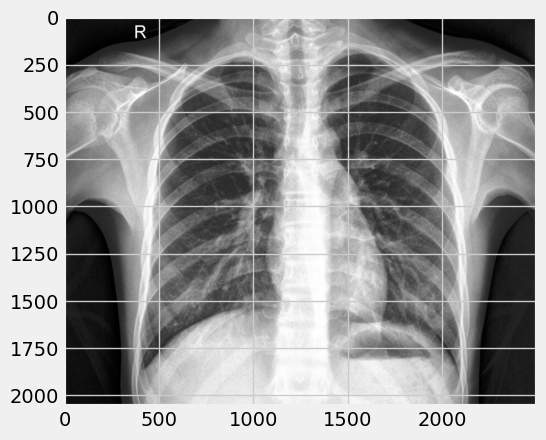

In [152]:
image_demo=image.load_img("./Normal/N12.jpg")
plt.imshow(image_demo)

In [153]:
# Image folder Location Defined here
sick_Img_folder = './Sick'
normal_Img_folder = './Normal'

Data Preprocessing:

-Load the image dataset and split it into training and testing sets.

-Resize and preprocess the images as required.

-Apply data augmentation techniques (e.g., rotation, flipping, brightness adjustment) to increase the training dataset size.

In [154]:
# Load all images with appropriate Labels
normal_Images_URL = [os.path.join(normal_Img_folder, img) for img in os.listdir(normal_Img_folder)]
sick_Images_URL = [os.path.join(sick_Img_folder, img) for img in os.listdir(sick_Img_folder)]
all_Images_URL = sick_Images_URL + normal_Images_URL
labels = [1] * len(sick_Images_URL) + [0] * len(normal_Images_URL)

# Cross-check whether the image matches the label name.
print(all_Images_URL[50])
print("The Image is :",labels[50])

./Normal\N28.jpg
The Image is : 0


In [155]:
# Define  size
image_height = 224
image_width = 224

#convert all images into matrix with reshaping
#Resize and preprocess the images as required.
final_all_Images_encode=[]
for url in all_Images_URL:
    img = tf.keras.utils.load_img(url, target_size=(image_height,image_width))  # Resize images to 224x224
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    final_all_Images_encode.append(img)

final_all_Images_encode = np.array(final_all_Images_encode)
labels = np.array(labels)

final_all_Images_encode[0]

array([[[-0.9372549 , -0.9372549 , -0.9372549 ],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.94509804, -0.94509804, -0.94509804],
        ...,
        [-0.9372549 , -0.9372549 , -0.9372549 ],
        [-0.9372549 , -0.9372549 , -0.9372549 ],
        [-0.8980392 , -0.8980392 , -0.8980392 ]],

       [[-0.94509804, -0.94509804, -0.94509804],
        [-0.9372549 , -0.9372549 , -0.9372549 ],
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        ...,
        [-0.9764706 , -0.9764706 , -0.9764706 ],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.92156863, -0.92156863, -0.92156863]],

       [[-0.9529412 , -0.9529412 , -0.9529412 ],
        [-0.96862745, -0.96862745, -0.96862745],
        [-0.96862745, -0.96862745, -0.96862745],
        ...,
        [-0.9607843 , -0.9607843 , -0.9607843 ],
        [-0.94509804, -0.94509804, -0.94509804],
        [-0.9372549 , -0.9372549 , -0.9372549 ]],

       ...,

       [[-1.        , -1.        , -1.        ],
        [-0

In [156]:
# Split the dataset into two parts (training and Validation sets)
x_train, x_test, y_train, y_test = train_test_split(final_all_Images_encode, labels, test_size=0.2, random_state=42)


In [157]:
print("Training set count is: ",len(x_train))
print("Testing set count is: ",len(x_test))

Training set count is:  48
Testing set count is:  12


In [158]:
#-Apply data augmentation techniques (e.g., rotation, flipping, brightness adjustment) to increase the training dataset size.
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,            # Normalize pixel values to [0, 1]
    rotation_range=20,              # Random rotation up to 20 degrees
    width_shift_range=0.2,          # Random horizontal shift
    height_shift_range=0.2,         # Random vertical shift
    horizontal_flip=True,           # Random horizontal flip
    brightness_range=(0.8, 1.2),     # Random brightness adjustment
    shear_range=0.2,
    zoom_range=0.2,
)
datagen.fit(x_train)


print(x_train.shape)
print(y_train.shape)

(48, 224, 224, 3)
(48,)


Model Building:

-Select a suitable pre-trained deep learning model (e.g., VGG, ResNet, Inception) or build a custom model from scratch.

-Fine-tune the model to adapt it to the specific task of human disease classification.

-Utilize transfer learning techniques to improve model performance.

In [159]:
# build a custom model from scratch.
# Create a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model Training and Evaluation:

-Train the model on the training dataset using appropriate loss function and optimizer.

-Implement early stopping and model checkpointing to prevent overfitting.

-Evaluate the model's performance on the testing dataset using relevant evaluation metrics (e.g., accuracy, precision, recall, F1-score).

In [160]:

# Train the model
batch_size = 8 
epochs = 10

#Implement early stopping and model checkpointing to prevent overfitting.
# Define callbacks for early stopping and model checkpointing
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

# Train the model with callbacks
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

# Load the best model checkpoint
best_model = tf.keras.models.load_model("best_model.h5")

Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 1.0621 - accuracy: 0.6042

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 10s 1s/step - loss: 1.0621 - accuracy: 0.6042 - val_loss: 0.6199 - val_accuracy: 0.8333
Epoch 2/10
6/6 [==============================] - 16s 3s/step - loss: 0.5230 - accuracy: 0.7292 - val_loss: 0.3486 - val_accuracy: 0.8333
Epoch 3/10
6/6 [==============================] - 14s 3s/step - loss: 0.3733 - accuracy: 0.8750 - val_loss: 0.1350 - val_accuracy: 0.9167
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 0.1221 - accuracy: 0.9792 - val_loss: 0.1495 - val_accuracy: 0.9167
Epoch 5/10
6/6 [==============================] - 15s 3s/step - loss: 0.1398 - accuracy: 0.9375 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 16s 3s/step - loss: 0.1421 - accuracy: 0.9375 - val_loss: 0.1775 - val_accuracy: 0.9167
Epoch 7/10
6/6 [==============================] - 16s 3s/step - loss: 0.0729 - accuracy: 0.9583 - val_loss: 0.1189 - val_accuracy: 0.9167
Epoch 8/10
6/6 [=============================

In [161]:
# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

print('_____________________________________________________')

# Make predictions on the testing dataset
test_predictions = best_model.predict(x_test)
test_predictions = (test_predictions > 0.5).astype(int)

print('_____________________________________________________')
# Generate a classification report
#Evaluate the model's performance on the testing dataset using relevant evaluation metrics (e.g., accuracy, precision, recall, F1-score).
report = classification_report(y_test, test_predictions, target_names=["Normal", "Sick"])
print(report)

1/1 [==============================] - 12s 12s/step - loss: 0.0357 - accuracy: 1.0000
Test Loss: 0.0357, Test Accuracy: 1.0000
_____________________________________________________
1/1 [==============================] - 13s 13s/step
_____________________________________________________
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         8
        Sick       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



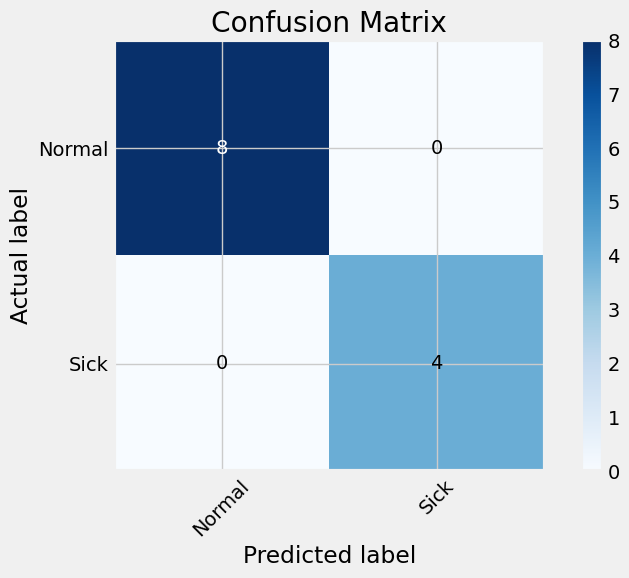

In [162]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", verticalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

            
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ["Normal", "Sick"]
plot_confusion_matrix(cm, classes=class_names)
plt.show()